In [18]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
from scipy.stats import spearmanr
import pickle

In [19]:
influence_dict = torch.load("GC_per_layer_outputs/influence_dict.pt")
whole_model_directory = "GC_outputs"
whole_model_directory_init = "init_GPT2_GC_outputs"

In [20]:
def show_corr(corr):
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True)
    # plt.imshow(correlations[0], cmap='hot', interpolation='nearest')
    plt.show()

In [21]:
correlations = []
for i in range(20):
    influence = np.stack([influence_dict[j][i] for j in range(12)])
    correlation, _ = spearmanr(influence, axis=1)
    correlations.append(correlation)

In [22]:
mean_correlation = np.mean(np.stack(correlations), axis=0)

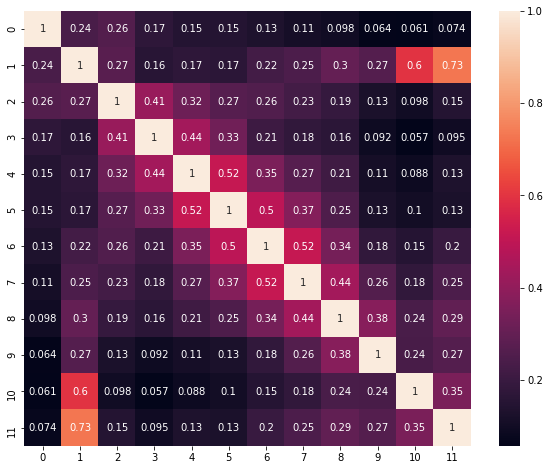

In [23]:
show_corr(mean_correlation)

In [24]:
correlations = []
for i in range(20):
    influence = np.stack([influence_dict[j][i] for j in range(12)]
                         + [pickle.load(open(f'{whole_model_directory}/influence_test_idx_{i}.pkl', 'rb')),
                            pickle.load(open(f'{whole_model_directory_init}/influence_test_idx_{i}.pkl', 'rb'))])
    correlation, _ = spearmanr(influence, axis=1)
    correlations.append(correlation)

In [25]:
mean_correlation = np.mean(np.stack(correlations), axis=0)

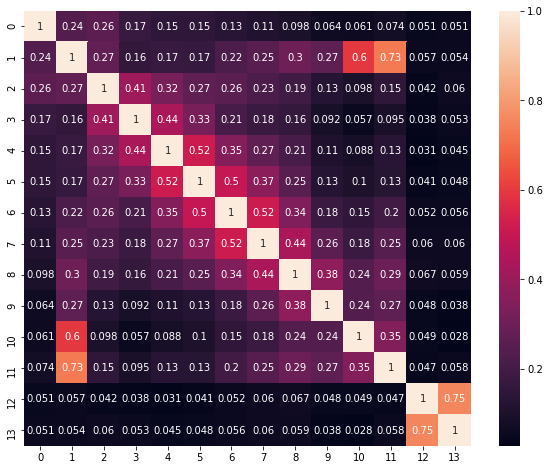

In [26]:
show_corr(mean_correlation)